In [1]:
import os
import difflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches as mpatches

import sys
sys.path.append('../../')
from rllte.evaluation.visualization import _annotate_and_decorate_axis, plot_interval_estimates
from rllte.evaluation import Performance
from utils import *

ICM: (2, 6103)
Disagreement: (2, 6103)
E3B: (2, 6102)
RND: (2, 6103)
PseudoCounts: (2,)
RIDE: (2,)
RE3: (2, 6102)
NGU: (2,)
Extrinsic: (2, 6102)


/var/folders/qy/nrh63j5j40d22qjyh16q40yc0000gn/T/ipykernel_17069/1939252055.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_data[algo] = np.array(all_data[algo])
/var/folders/qy/nrh63j5j40d22qjyh16q40yc0000gn/T/ipykernel_17069/1939252055.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_data[algo] = np.array(all_data[algo])
/var/folders/qy/nrh63j5j40d22qjyh16q40yc0000gn/T/ipykernel_17069/1939252055.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

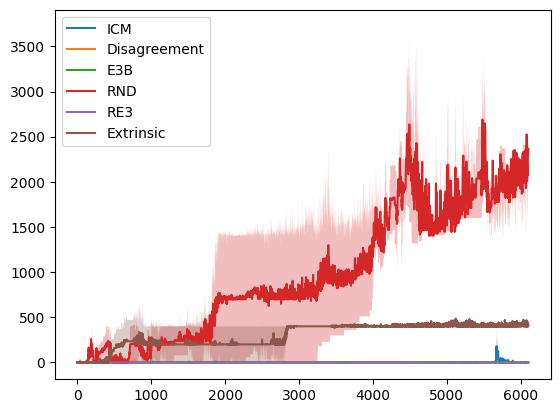

In [7]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU', 'Extrinsic']
root = f"/Users/yuanmingqi/Downloads/nips2024_data/atariRuns/montezuma"
all_data = {algo: [] for algo in algos}

for algo in algos:
    for dir in os.listdir(root):
        if algo.lower() in dir:
            file = f"{root}/{dir}/"
            file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
            data = pd.read_csv(file)['episode_reward']
            # data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
            all_data[algo].append(data)

    all_data[algo] = np.array(all_data[algo])
    print(f"{algo}: {all_data[algo].shape}")

for algo in algos:
    try:
        mean, std = np.mean(all_data[algo], axis=0), np.std(all_data[algo], axis=0)
        plt.plot(mean, label=algo)
        plt.fill_between(np.arange(mean.shape[0]), mean - std, mean + std, alpha=0.3)
    except:
        pass
plt.legend()